In [43]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab
from pylab import rcParams

In [216]:
def calc_def(x_1, y_1, y_2, x_3, y_3, y_4, x_5, y_5, y_6):
    bef = (0.1 - 10 * y_1) / (y_2 - y_1) + x_1
    aft_conv = (0.1 - 10 * y_3) / (y_4 - y_3) + x_3
    aft_prop = (0.1 - 10 * y_5) / (y_6 - y_5) + x_5
    gamma = (aft_prop - aft_conv) / aft_conv
    return [bef, aft_conv, aft_prop, gamma]

In [217]:
abilene = calc_def(70, 0.0096,0.0275,70, 0.0033,0.0165,80,0.0027,0.0115)
abilene

[70.22346368715084, 75.07575757575758, 88.29545454545455, 0.1760847628657921]

In [218]:
nsf = calc_def(130, 0.0082, 0.0170, 130, 0.0032, 0.0105, 190, 0.0086, 0.0191)
nsf

[132.04545454545453,
 139.31506849315068,
 191.33333333333334,
 0.3733857751556868]

In [219]:
indian = calc_def(130, 0.0073, 0.0151, 140, 0.0094, 0.0191, 180, 0.0059, 0.0122)
indian

[133.46153846153845,
 140.61855670103094,
 186.5079365079365,
 0.32633943117814074]

In [220]:
japanese = calc_def(90, 0.0069, 0.0166, 90, 0.0044, 0.0104, 140, 0.0072, 0.0133)
japanese

[93.19587628865979, 99.33333333333333, 144.59016393442624, 0.45560567719221057]

In [204]:
tr_ld = pd.DataFrame(
    columns=['Conventional', 'Proposed']
)

In [205]:
tr_ld

,Conventional,Proposed


In [206]:
tr_ld.loc['Abilene'] = abilene 

In [207]:
tr_ld.loc['NSF'] = nsf

In [208]:
tr_ld.loc['Indian'] = indian

In [209]:
tr_ld.loc['Japanese'] = japanese

In [210]:
tr_ld

,Conventional,Proposed
Abilene,4.852294,18.071991
NSF,7.269614,59.287879
Indian,7.157018,53.046398
Japanese,6.137457,51.394288


In [211]:
plt.clf()
pylab.figure(figsize=(7, 7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderaxespad'] = 0
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['savefig.bbox'] = 'tight'

<Figure size 432x288 with 0 Axes>

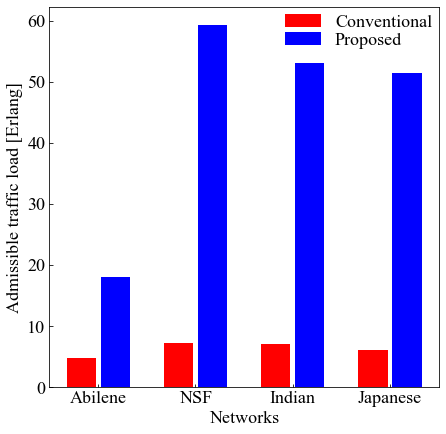

In [212]:
x = tr_ld.index.values

x_position = np.arange(len(x))

plt.bar(x_position,       tr_ld['Conventional'], width=0.3, label='Conventional', color='red') 
plt.bar(x_position + 0.35, tr_ld['Proposed']    , width=0.3, label='Proposed'    , color='blue') 
plt.legend()
plt.minorticks_off()
plt.xticks(x_position + 0.175, x)
plt.xlabel('Networks')
plt.ylabel('Admissible traffic load [Erlang]')

plt.savefig("../../sawa_paper/sawa/20180921_journal/fig/traffic_load.pdf")
plt.show()
plt.close()